# Part 1 Model a Deep Feed Forward Network for Regression

## 1.Generating Training Data

make some awesome explanation here.

In [49]:
import numpy as np
import random as rnd
import pandas as pd

#define 9 dimensional x (input) numpy array
x = np.zeros(9, np.float64)

#define 5 dimensional y (output) numpy array
y = np.zeros(5, np.float64)

#define y functions
# y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
# y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (2 * x[6] * x[7]) + 1
# y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
# y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
# y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (x[0] ** 2 * x[6]) - 1

fh = open("training_data.txt","w")


#generate random inputs for every iteration
def generate_random_x():
    for index, x_i in enumerate(x):
        #x[index] = rnd.uniform(0, 100)
        x[index] = rnd.random()
        # x[index] = rnd.randint(0, 10000)
        
def calculate_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh.write(str(x_i))
        fh.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        # some noise added.
        y[y_i] += y[y_i] * 0.001
        fh.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh.write(" ")

    # fh.write(' y' + str(index))
    fh.write("\n")

#generate 600 training samples.
for i in range(0, 125, 1):

    for j in range(0, 5, 1):
        calculate_y()

fh.close()

column_names = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y0', 'y1', 'y2', 'y3', 'y4']

df = pd.read_csv("training_data.txt", header=None, delimiter=' ')

df.columns = column_names

df.head()






,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.094509,0.888690,0.434537,0.541906,0.189211,0.722835,0.640584,0.254331,0.096062,0.184938,1.057663,-2.097157,-0.505338,-3.295643
1,0.987289,0.800200,0.621521,0.985556,0.996277,0.292472,0.149710,0.105079,0.300476,3.228932,2.018992,-11.853106,-2.326171,-2.256239
2,0.637748,0.282461,0.710468,0.473841,0.187506,0.338222,0.613821,0.396800,0.265362,-0.657680,0.448185,-2.572760,-2.247806,-2.024908
3,0.447019,0.296505,0.528799,0.678879,0.325948,0.797953,0.312114,0.107037,0.842038,0.784440,1.035943,-3.034282,-0.077107,-3.410585
4,0.879610,0.160176,0.876411,0.835359,0.426384,0.587042,0.401835,0.662446,0.335276,-2.603301,0.200334,-3.943553,-4.687033,-3.213601


## 2.Generating Test Data

In [50]:

fh_test = open("test_data.txt", "w")

def calculate_test_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh_test.write(str(x_i))
        fh_test.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        fh_test.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh_test.write(" ")

    # fh.write(' y' + str(index))
    fh_test.write("\n")
    
#generate 100 test samples.    
for i in range(0, 20, 1):
    for j in range(0, 5, 1):
        calculate_test_y()

fh_test.close()
    
df_test = pd.read_csv("test_data.txt", header=None, delimiter=' ')

df_test.columns = column_names

df_test.head()



,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.791713,0.520517,0.334399,0.046448,0.358223,0.356804,0.716685,0.850774,0.454570,-3.376884,-0.048423,-2.366127,-3.665661,-1.626699
1,0.843919,0.048050,0.259797,0.069964,0.375362,0.699747,0.454588,0.856862,0.015259,-4.291439,0.623395,-2.255819,-3.195071,-2.784133
2,0.652189,0.298108,0.075187,0.544444,0.092703,0.131065,0.216503,0.648724,0.478817,-1.721654,0.730097,-2.982462,-2.182639,-1.459545
3,0.996690,0.196555,0.203467,0.625133,0.388275,0.307186,0.506905,0.328540,0.560634,-1.339063,0.836413,-4.194342,-1.642643,-1.607973
4,0.596973,0.921509,0.308967,0.781528,0.891551,0.363780,0.121572,0.353583,0.829124,1.890836,1.642225,-5.601977,-2.540308,-2.563593


## 3. Loading Training and Test Datasets

In [51]:
#load training dataset
training_dataset = np.loadtxt("training_data.txt", delimiter=' ')

X_Train = training_dataset[:, 0:9]
Y_Train = training_dataset[:, 9:14]

#load test dataset
test_dataset = np.loadtxt("test_data.txt", delimiter=' ')

X_Test = test_dataset[:, 0:9]
Y_Test = test_dataset[:, 9:14]

## 4. Creating Model
We have 9 inputs and 5 outputs.

In [53]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Dense, Activation

#set different parameters here.
activation="tanh"
learning_rate=0.01
epoch_size=1000

hidden_1 = 8
hidden_2 = 6
hidden_3 = 6

model = Sequential()
model.add(Dense(9, input_dim=9))
model.add(Activation(activation))
model.add(Dense(hidden_1))
model.add(Activation(activation))
model.add(Dense(hidden_2))
model.add(Activation(activation))
model.add(Dense(hidden_3))
model.add(Activation(activation))
model.add(Dense(5))
model.add(Activation('linear'))

#model.summary()

sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(X_Train, Y_Train, epochs=epoch_size, verbose=0)

training_scores = model.evaluate(X_Train, Y_Train)

test_scores = model.evaluate(X_Test,Y_Test)

print("Epoch_size: " + str(epoch_size))
print("Learning Rate: " + str(learning_rate))
print("Activation " + str(activation))
print("Hidden_1 " + str(hidden_1))
print("Hidden_2 " + str(hidden_2))
print("Hidden_3 " + str(hidden_3))


print("Train Loss: %f" % (training_scores))
print("Test Loss: %f " % (test_scores))


100/100 [==============================] - 0s 67us/step
Epoch_size: 1000
Learning Rate: 0.01
Activation tanh
Hidden_1 8
Hidden_2 6
Hidden_3 6
Train Loss: 0.093689
Test Loss: 0.092102 


| Data Size | Input Node | Input Act | Dense-1 | Dense-1 Act | Dense-2 | Dense-2 Act | Dense-3 | Dense-3 Act | Output Node | Output Act | L.Rate | Epoch | Train Error | Test Error |
|:---------:|:----------:|:---------:|:-------:|:-----------:|:-------:|:-----------:|:-------:|:-----------:|:-----------:|:----------:|:------:|:-----:|:-----------:|:----------:|
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.242384  |  0.296860  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.126778  |  0.167803  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.217331  |  0.260438  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1000 |   0.218391  |  0.280169  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1500 |   0.190859  |  0.242867  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  2000 |   0.179826  |  0.242151  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1000 |   0.410062  |  0.473462  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1500 |   0.569335  |  0.677881  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  2000 |   0.345615  |  0.403062  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1000 |   1.822732  |  2.347571  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1500 |   0.805988  |  0.992025  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  2000 |   0.462038  |  0.488292  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.283931  |  0.325317  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.397254  |  0.421426  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.230768  |  0.269217  |
|    600    |      9     |    tanh   |    6    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.230664  |  0.284872  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.107739  |  0.147939  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.106117  |  0.138951  |
|    625    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.100039  |  0.105181  |

## Adding New Nodes to Hidden Layers

# Part 2 Digit Recognition using CNNs

## 1. Loading Data

5


True

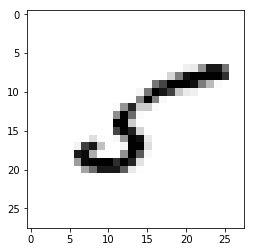

In [7]:
import tensorflow as tf

mnist_digits = tf.keras.datasets.mnist


#mnist_digits.load_data()


(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
image_index = 11 
# You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


## Loading AlexNET

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.regularizers import l2


img_shape = (28,28,1)
l2_reg = 0

alexnet = Sequential()

alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
                       padding='same', kernel_regularizer=l2(l2_reg)))

alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))